 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_csv = Path("Resources/whale_returns.csv")

algo_csv = Path("Resources/algo_returns.csv")

sp_tsx_csv = Path("Resources/sp_tsx_history.csv")

In [3]:
whale_df = pd.read_csv(whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_df = pd.read_csv(algo_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp_tsx_df = pd.read_csv(sp_tsx_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
# Reading whale returns
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df.tail()

,Close
Date,
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"
2019-12-27,"$17,168.21"
2019-12-30,"$17,098.56"


In [11]:
# Check Data Types
print(sp_tsx_df.dtypes)
print(algo_df.dtypes)
print(whale_df.dtypes)

Close    object
dtype: object
Algo 1    float64
Algo 2    float64
dtype: object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


In [12]:
# Fix Data Types remove $ and any 

sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$','',regex=True)
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")

sp_tsx_df


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
# Calculate Daily Returns
sp_daily = sp_tsx_df.pct_change()
sp_daily

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [14]:
# Drop nulls
sp_daily.isna().sum() #calculated how many nulls

sp_daily = sp_daily.dropna() #dropped nulls

sp_daily.isna().sum() # confirmed nulls dropped

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily = sp_daily.rename(columns = {'Close':'S&P TSX 60'})
sp_daily

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [45]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
total_df = pd.concat([sp_daily,algo_df,whale_df], axis='columns', join='inner')
#total_df_2 = total_df = pd.concat([algo_df,whale_df], axis='columns', join='inner') # for calculating agaisnt sp tsx 60
total_df

,S&P TSX 60,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-25,-0.000628,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.002254,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
2019-04-29,-0.000788,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

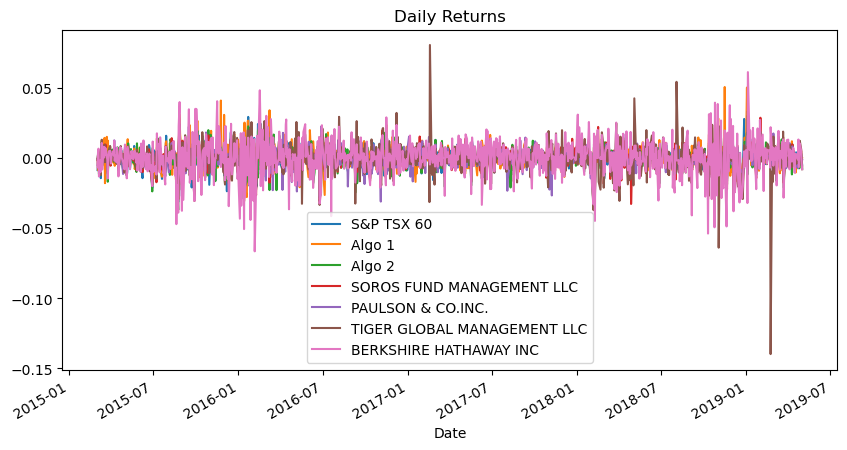

In [46]:
# Plot daily returns of all portfolios
total_df.plot(figsize=(10,5), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

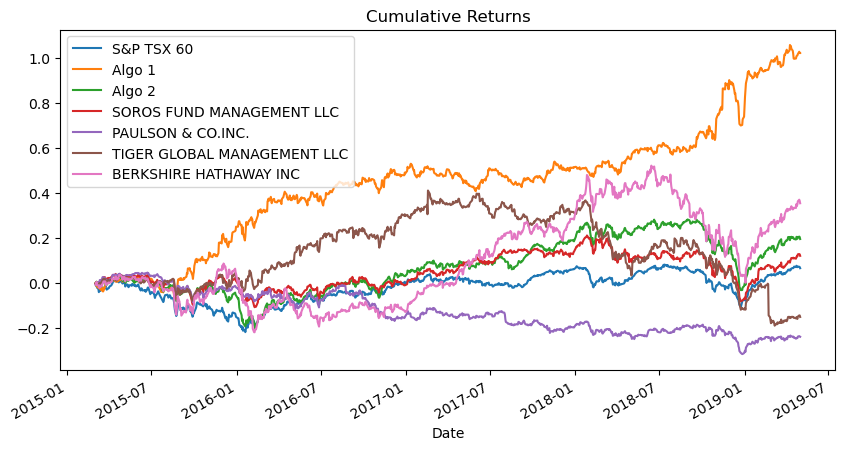

In [47]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + total_df).cumprod()- 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

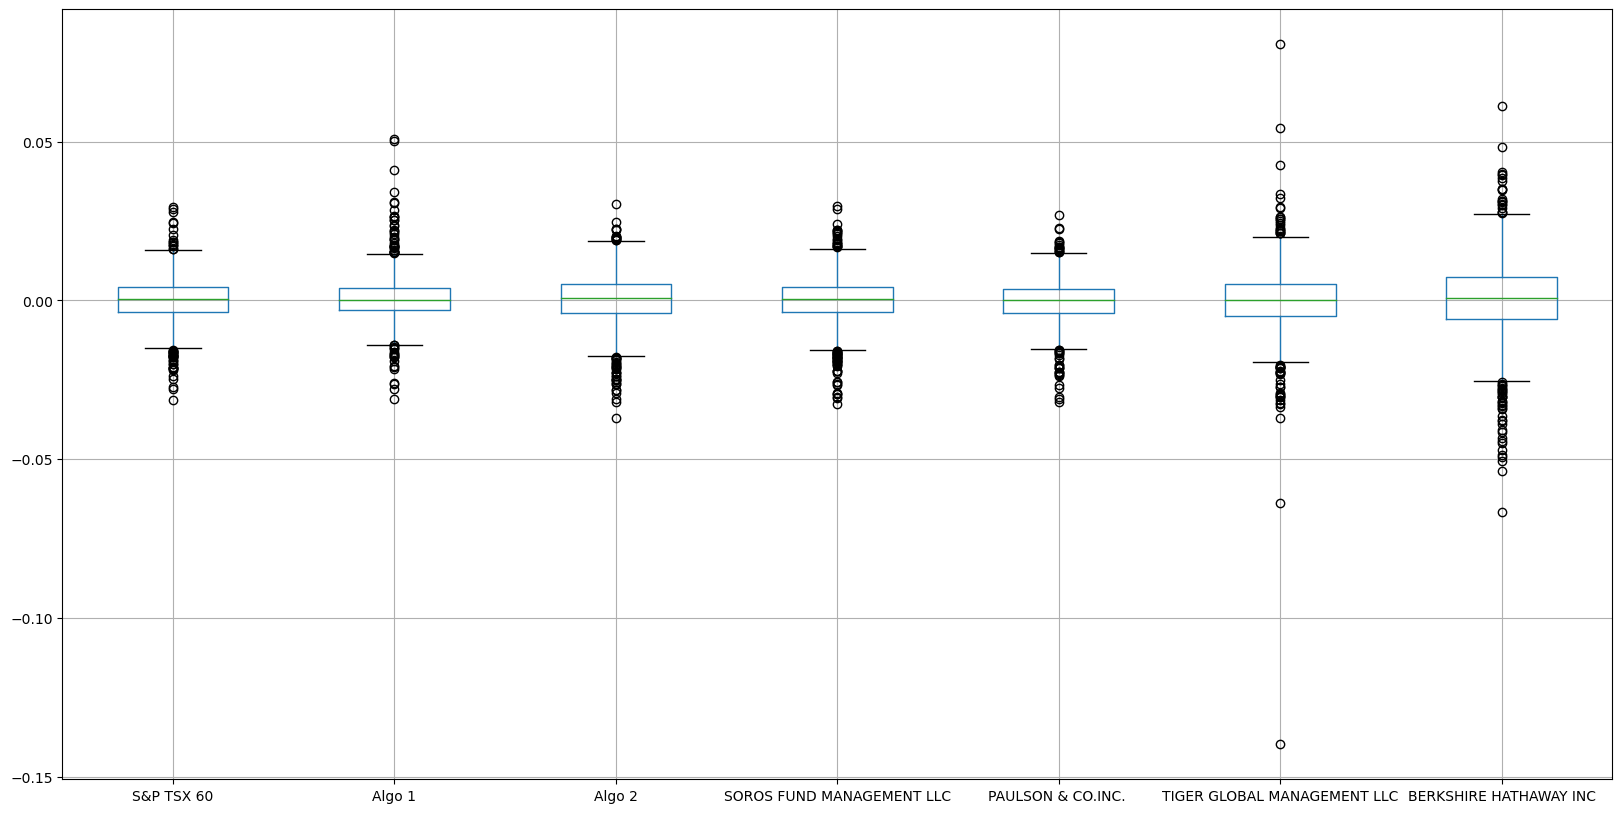

In [48]:
# Box plot to visually show risk
total_df.boxplot(figsize=(20,10)) # boxplot to see which portfolio is more risky looks like Tiger Global


### Calculate Standard Deviations

In [49]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = total_df.std()
standard_deviation

S&P TSX 60                     0.007034
Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [64]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = sp_daily.std()
sp_std
# Determine which portfolios are riskier than the S&P TSX 60
standard_deviation = standard_deviation.sort_values(ascending=False) # sorting in desending order to find the highest risk which shows Berkshire and Tiger Global are highest
standard_deviation

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized standard deviation (252 trading days)
annualized_varriance = total_df.var()*(252)
annualized_standard_deviation = np.sqrt(annualized_varriance)
annualized_standard_deviation

Algo 1                         0.120660
Algo 2                         0.132186
SOROS FUND MANAGEMENT LLC      0.125080
PAULSON & CO.INC.              0.111281
TIGER GLOBAL MANAGEMENT LLC    0.172648
BERKSHIRE HATHAWAY INC         0.204650
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21 Day Standard Deviation'}, xlabel='Date'>

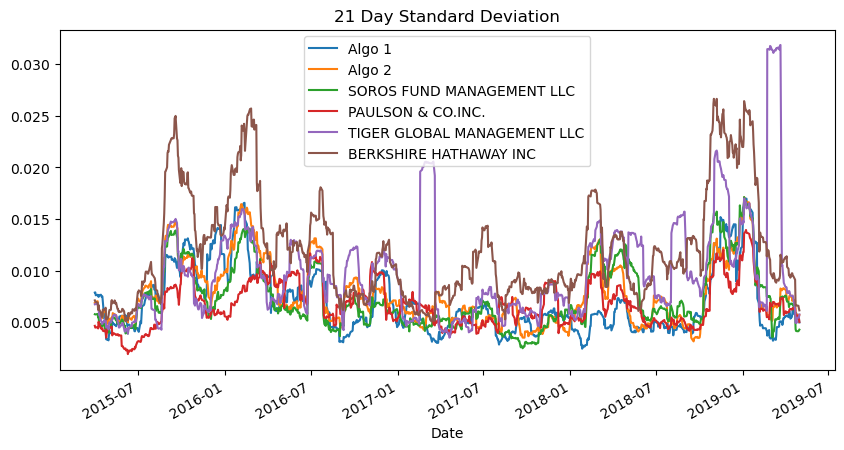

In [40]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
total_df.rolling(window=21).std()
# Plot the rolling standard deviation
total_df.rolling(window=21).std().plot(figsize=(10,5), title="21 Day Standard Deviation")

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation'}>

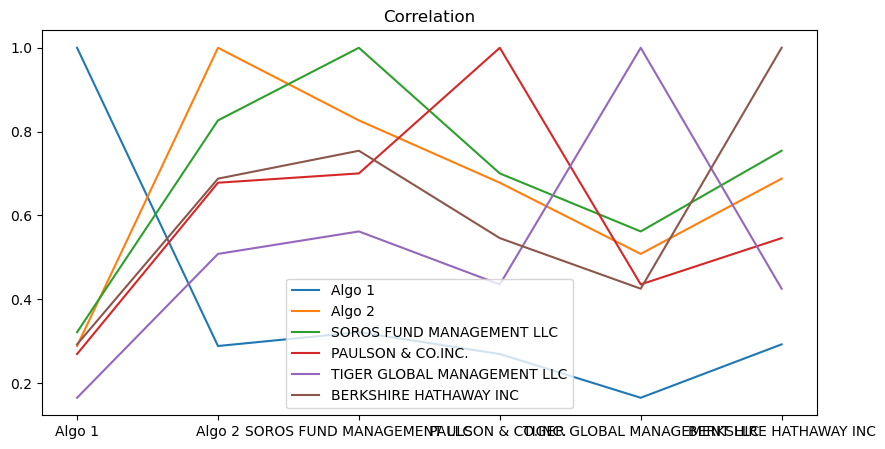

In [42]:
# Calculate the correlation
correlation = total_df.corr()
# Display the correlation matrix
correlation.plot(figsize=(10,5), title="Correlation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [72]:
# Calculate covariance of a single portfolio

covariance = total_df['Algo 1'].cov(total_df['S&P TSX 60'])
# Calculate variance of S&P TSX
variance =total_df['S&P TSX 60'].var()
# Computing beta
algo_beta = covariance / variance
# Plot beta trend
algo_beta

0.3347445908185686

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

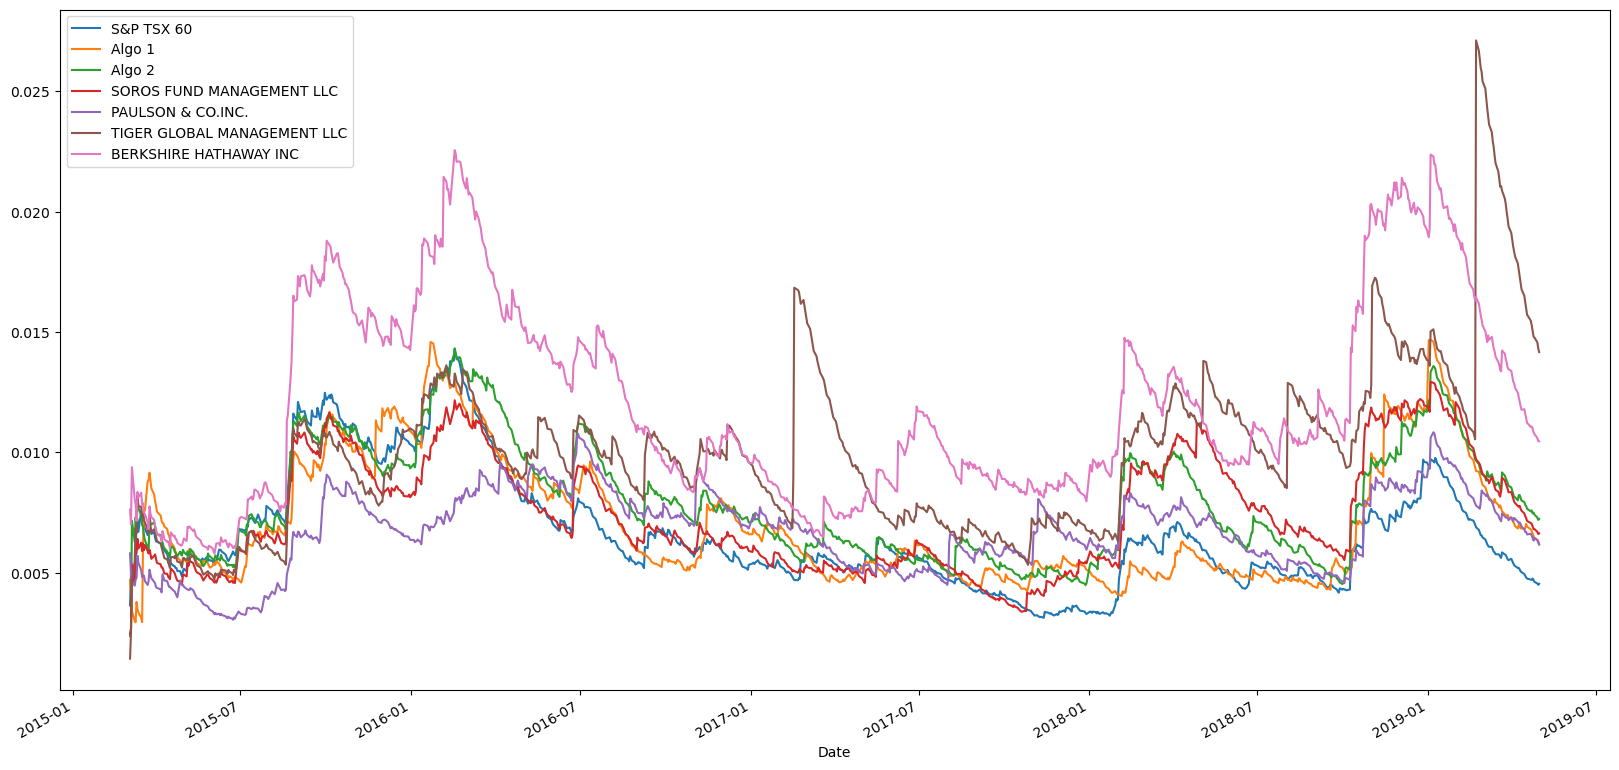

In [73]:
# Use `ewm` to calculate the rolling window
total_df.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [74]:
# Annualized Sharpe Ratios
sharpe_ratios = total_df.mean()*252 / (total_df.std() * np.sqrt(252))
sharpe_ratios

S&P TSX 60                     0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

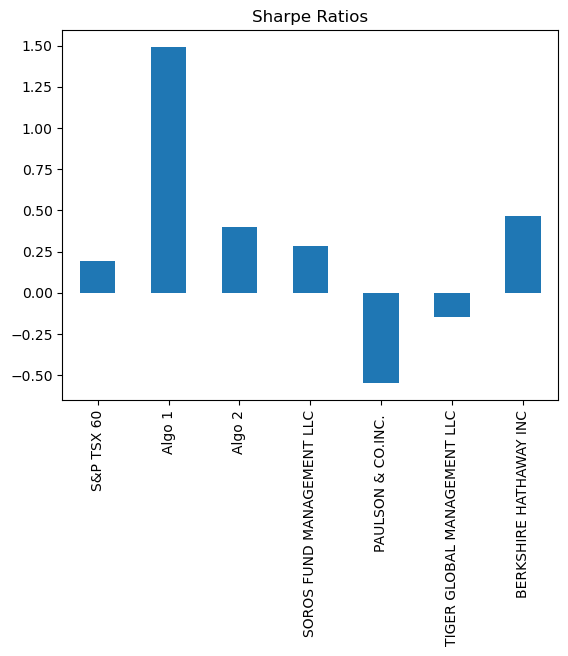

In [75]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

## I would say that with the consistency and the ability to take the emotion out of it, that algorithmic strategies can outperform both the market and the wahles protfolios(depending on their edge).

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!